In [1]:
# %pip install torch
# %pip install tensorflow
# %pip install opencv-python
# %pip install numpy
# %pip install matplotlib

In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
X_train_path = "DOTAv1\\images\\train"
Y_train_path = "DOTAv1\\labels\\train"
X_val_path = "DOTAv1\\images\\val"
Y_val_path = "DOTAv1\\labels\\val"
X_test_path = "DOTAv1\\images\\test"

X_train = os.listdir(X_train_path)
Y_train = os.listdir(Y_train_path)


X_val = os.listdir(X_val_path)
Y_val = os.listdir(Y_val_path)
X_test = os.listdir(X_test_path)
# print(len(X_train), len(Y_train))
# print(len(X_val), len(Y_val))
# print(len(X_test))

print(X_train)
print(937/1411)


['P0000.jpg', 'P0001.jpg', 'P0002.jpg', 'P0005.jpg', 'P0008.jpg', 'P0010.jpg', 'P0011.jpg', 'P0012.jpg', 'P0013.jpg', 'P0018.jpg', 'P0020.jpg', 'P0021.jpg', 'P0022.jpg', 'P0023.jpg', 'P0025.jpg', 'P0029.jpg', 'P0030.jpg', 'P0032.jpg', 'P0036.jpg', 'P0038.jpg', 'P0039.jpg', 'P0041.jpg', 'P0042.jpg', 'P0044.jpg', 'P0049.jpg', 'P0050.jpg', 'P0052.jpg', 'P0054.jpg', 'P0058.jpg', 'P0061.jpg', 'P0063.jpg', 'P0064.jpg', 'P0065.jpg', 'P0066.jpg', 'P0067.jpg', 'P0068.jpg', 'P0070.jpg', 'P0071.jpg', 'P0074.jpg', 'P0076.jpg', 'P0078.jpg', 'P0082.jpg', 'P0083.jpg', 'P0085.jpg', 'P0087.jpg', 'P0091.jpg', 'P0093.jpg', 'P0094.jpg', 'P0095.jpg', 'P0096.jpg', 'P0098.jpg', 'P0099.jpg', 'P0100.jpg', 'P0103.jpg', 'P0109.jpg', 'P0111.jpg', 'P0113.jpg', 'P0116.jpg', 'P0119.jpg', 'P0122.jpg', 'P0124.jpg', 'P0126.jpg', 'P0129.jpg', 'P0133.jpg', 'P0136.jpg', 'P0139.jpg', 'P0140.jpg', 'P0141.jpg', 'P0142.jpg', 'P0144.jpg', 'P0147.jpg', 'P0149.jpg', 'P0151.jpg', 'P0152.jpg', 'P0158.jpg', 'P0159.jpg', 'P0160.jpg'

In [4]:
input_folder = "DOTAv1\\images\\train"
output_folder = "DOTAv1\\preprocessed_images\\train"
input_labels_folder = "DOTAv1\\labels\\train"
output_labels_folder = "DOTAv1\\preprocessed_labels\\train"

os.makedirs(output_folder, exist_ok=True)
os.makedirs(output_labels_folder, exist_ok=True)

def resize_image(input_path, output_path, input_label_path, output_label_path, target_size=(800, 800)):
    try:
        img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
        previous_size = img.shape[0]
        label_size_change_x = 800 / previous_size
        label_size_change_y = 800 / img.shape[1]

        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
        resized_img = resized_img.reshape((800, 800, 1))
        # resized_img = resized_img.astype(np.float32) / 255.0
        cv2.imwrite(output_path, resized_img)
        print(resized_img.shape)
        with open(input_label_path, "r") as f:
            lines = f.readlines()
            with open(output_label_path, "w") as g:
                for line in lines:
                    x = line.split()
                    class_label = x[0]
                    coords = np.array(x[1:], dtype=float)
                    for i in range(len(coords)):
                        if i % 2 == 0:
                            coords[i] *= label_size_change_y
                        else:
                            coords[i] *= label_size_change_x
                    g.write(f"{class_label} {' '.join(map(str, coords))}\n")
        
        # print(f"Processed {input_path} and {input_label_path}")
    
    except Exception as e:
        print(f"Error processing {input_path}: {e}")

for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        label_file_name = filename.replace(".jpg", ".txt")
        input_label_path = os.path.join(input_labels_folder, label_file_name)
        output_label_path = os.path.join(output_labels_folder, label_file_name)
        
        resize_image(input_path, output_path, input_label_path, output_label_path)


(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 800, 1)
(800, 

In [5]:
no_of_classes = 15

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(800, 800, 1), padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, kernel_size=3, activation = 'relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu', padding="same"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),

    tf.keras.layers.Dense(no_of_classes, activation='softmax', name="classifier_head")
])

classification_model_summary = model.summary()

C:\Users\adity\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 800, 800, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 400, 400, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 400, 400, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 200, 200, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 200, 200, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 100, 100, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 100, 100, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    20,480,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier_head (Dense)         │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,145,743 (80.66 MB)

 Trainable params: 21,145,743 (80.66 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
def build_regressor(inputs):

    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(800, 800, 1))(inputs)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Conv2D(256, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)
    
    x = tf.keras.layers.Conv2D(128, kernel_size=3, activation = 'relu')(x)
    x = tf.keras.layers.MaxPooling2D(2,2)(x)

    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    
    x = tf.keras.layers.Dense(units = '8', name="regressor_head")(inputs)(x)

    return x

In [7]:
def loss_function():
    pass

In [8]:
# def data_load():
#     X = []
#     Y = []
#     for file in os.listdir(output_folder):
#         img = cv2.imread(os.path.join(output_folder, file), cv2.IMREAD_GRAYSCALE)

#         with open(os.path.join(output_labels_folder, file.replace(".jpg", ".txt")), "r") as f:
#             lines = f.readlines()
#             for line in lines:
                







#     X = np.array(X)
#     X = np.expand_dims(X, axis=-1)
#     X = tf.convert_to_tensor(X, dtype=tf.float32)
#     Y = tf.convert_to_tensor(Y, dtype=tf.float32)
#     result = tf.data.Dataset.from_tensor_slices((X, Y))

#     return result
    
    


0 [568.3616, 590.6583999999999, 596.232, 579.0968] [350.1272, 346.7832, 358.8512, 363.79519999999997]


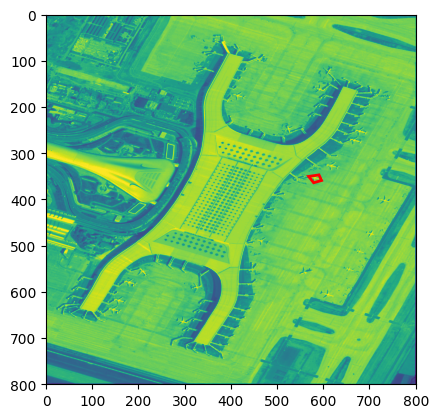

In [9]:
# model = tf.keras.Model(inputs = inputs, outputs = ["classifier_head", "regressor_head"])
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.image as mpimg
import os
image = os.path.join(output_folder, os.listdir(output_folder)[0])
img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

text_file = os.listdir(output_folder)[0].replace(".jpg", ".txt")

coords_x = []
coords_y = []
with open(os.path.join(input_labels_folder, text_file), "r") as f:
    line = f.readlines()[0]
    line = line.split()
    label = line[0]
    coords_x = [float(elt) * 800 for elt in line[1:9:2]]
    coords_y = [float(elt) * 800 for elt in line[2:9:2]]

print(label, coords_x, coords_y)


# Define the coordinates of the polygon

points = list(zip(coords_x, coords_y))

# Load the image
image_path = image  # Replace with your image path
img = mpimg.imread(image_path)

# Create a new figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Create the polygon and add it to the plot
polygon = Polygon(points, closed=True, fill=None, edgecolor='r', linewidth=2)
ax.add_patch(polygon)

# Set the x and y axis limits to show the entire image
ax.set_xlim(0, img.shape[1])
ax.set_ylim(img.shape[0], 0)

# Show the plot
plt.show()